In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [121]:
loan=pd.read_csv('loan_data.csv')

In [122]:
loan['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [123]:
loan1=loan.copy()

In [124]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [125]:
loan=pd.get_dummies(data=loan,columns=['purpose'],drop_first=True)

In [126]:
loan.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [127]:
loan.shape

(9578, 19)

Text(0.5, 0, 'FICO')

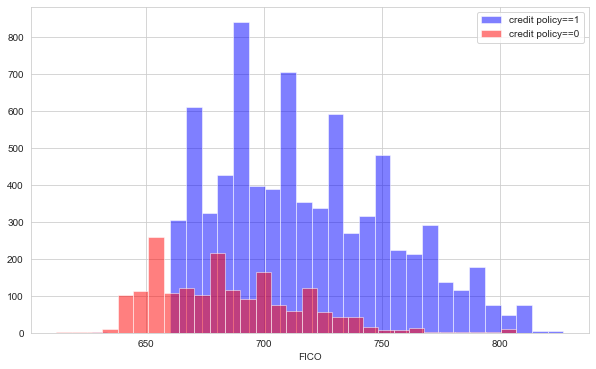

In [128]:
plt.figure(figsize=(10,6))
loan[loan['credit.policy']==1]['fico'].hist(label='credit policy==1',alpha=0.5,color='blue',bins=30)
loan[loan['credit.policy']==0]['fico'].hist(label='credit policy==0',alpha=0.5,color='red',bins=30)
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

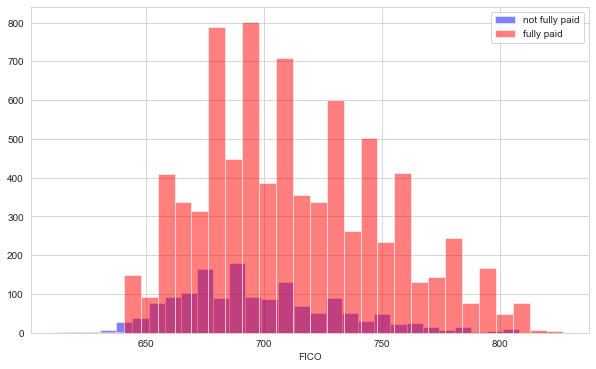

In [129]:
plt.figure(figsize=(10,6))
loan[loan['not.fully.paid']==1]['fico'].hist(alpha=0.5,label='not fully paid',color='blue',bins=30)
loan[loan['not.fully.paid']==0]['fico'].hist(alpha=0.5,label='fully paid',color='red',bins=30)
plt.legend()
plt.xlabel('FICO')

In [130]:
loan1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


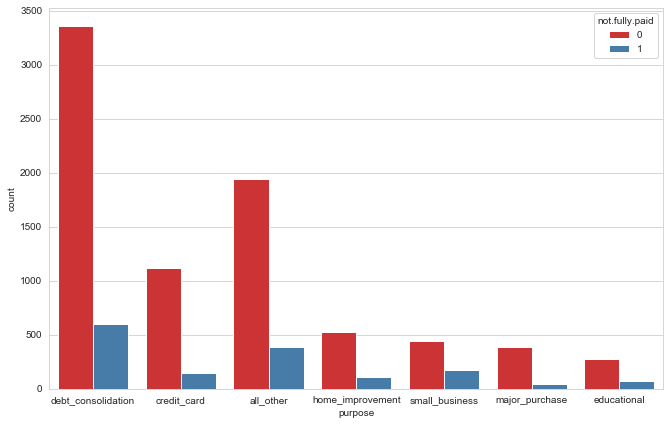

In [131]:
plt.figure(figsize=(11,7))
sns.countplot(loan1['purpose'],hue=loan1['not.fully.paid'],palette='Set1')

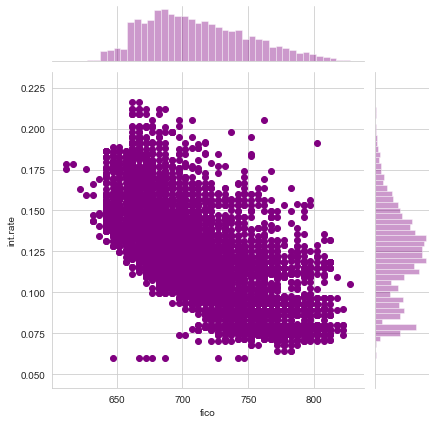

In [132]:
sns.set_style('whitegrid')
sns.jointplot(y='int.rate',x='fico',data=loan1,color='purple')

<Figure size 792x504 with 0 Axes>

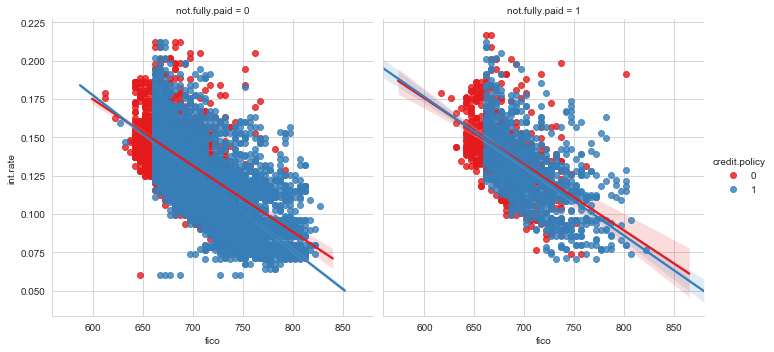

In [133]:
plt.figure(figsize=(11,7))
sns.lmplot(x='fico',y='int.rate',data=loan1,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
scaler=StandardScaler()

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X=loan.drop('not.fully.paid',axis=1)
y=loan['not.fully.paid']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [139]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rfc=RandomForestClassifier(n_estimators=500)

In [142]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [143]:
pred=rfc.predict(X_test)

In [144]:
from sklearn.metrics import classification_report,confusion_matrix

In [145]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[2423    8]
 [ 432   11]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.58      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [146]:
from xgboost import XGBClassifier

In [147]:
xgb=XGBClassifier(n_estimators=500)

In [148]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [149]:
pred_xgb=xgb.predict(X_test)

In [150]:
print(confusion_matrix(y_test,pred_xgb))
print(classification_report(y_test,pred_xgb))

[[2334   97]
 [ 394   49]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      2431
           1       0.34      0.11      0.17       443

    accuracy                           0.83      2874
   macro avg       0.60      0.54      0.54      2874
weighted avg       0.78      0.83      0.79      2874

